For detailed information about the dataset and its respective preparation and/or Principal Component Analysis please look at 'Titanic(age_by_mean)_PCA_LogisticRegression'. In this file I will skip each step explained in that file and will talk about only the things not covered in it.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix
df = pd.read_csv('Data/titanic_train.csv')

In [2]:
df = df.drop(['Name','Ticket','Cabin'], axis=1)

In [3]:
df.loc[:,"Age"].median()


28.0

In [4]:
df["Age"].fillna(28, inplace = True)

In [5]:
df.dropna(inplace=True)

In [6]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [7]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [8]:
X=df.drop('Survived',axis=1)
X_renamed = X.rename(columns={'SibSp': 'Num Siblings/Spoused','Parch':'Num Parents/Children'})
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_renamed, y, test_size=0.3,random_state=2)

I will import the KNN Regressor library and try to find out which hyperparameters suit our dataset best, note that standardization is required for this method.

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_renamed)
X_renamed = scaler.transform(X_renamed)
Knn = KNeighborsRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


Knn.fit(X_train,y_train)
prediction_Knn = Knn.predict(X_test)

0.018732435227149957 distance 9
0.04404608853850822 uniform 9


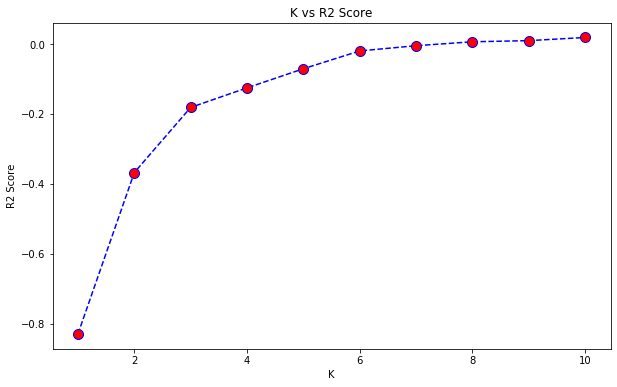

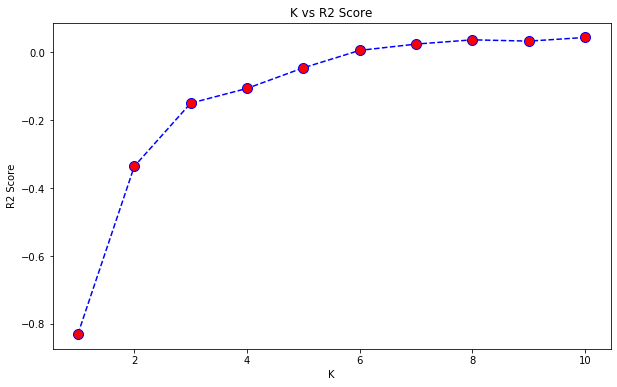

In [10]:
for w in ('distance','uniform'):
    variance_score = []
    for i in range (1,11):
        knn = KNeighborsRegressor(n_neighbors=i,weights=w)
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
        variance_score.append(r2_score(y_test, y_pred))
        
    plt.figure(figsize=(10,6))
    plt.plot(range(1,11),variance_score,color='blue',linestyle='dashed',marker='o', markerfacecolor='red',markersize=10)
    plt.title('K vs R2 Score')
    plt.xlabel('K')
    plt.ylabel('R2 Score')
    index = np.argsort(variance_score)[-1]
    print(variance_score[index], w, index)

K = 9 uniform Variance score: 0.03


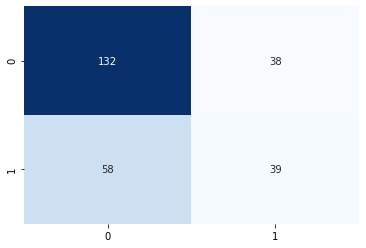

In [11]:
Knn = KNeighborsRegressor(n_neighbors=9,weights='uniform')
Knn.fit(X_train,y_train)
y_pred = Knn.predict(X_test)
variance_score.append(r2_score(y_test, y_pred))
print('K =',9,'uniform','Variance score: %.2f' % r2_score(y_test, y_pred))

for i in range(0,len(y_pred)):
    if y_pred[i]==0:
        y_pred[i]= y_pred[i]
    elif y_pred[i] == 1:
        y_pred[i]= y_pred[i]
    elif y_pred[i]> 0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0
        
cfm = confusion_matrix(y_test,y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

In [12]:
Score = round(Knn.score(X_train, y_train) * 100, 2)
Score

18.65